# Data Set
Age :- This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).


Sex :- This is the policy holder's gender, either male or female.


BMI :- This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.


Children :- This is an integer indicating the number of children / dependents covered by the insurance plan.


Smoker :- This is yes or no depending on whether the insured regularly smokes tobacco.


Region :- This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.


Charges​ :- Individual medical costs billed to health insurance

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
df=pd.read_csv(r"C:\Users\emilb\OneDrive\Desktop\Insurance.csv")

In [200]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [201]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [202]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [203]:
df.shape

(1338, 7)

In [204]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [205]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Types of variables

Categorical varibles - sex,smoker,region,children


Quantitative variables -age,bmi,charges. Here children is a discrete variable where as age, bmi, and charges are continous variables.


There are no missing values

In [207]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Observations

Average age of the primary beneficiary is 39.2 and maximum age is 64.


Average BMI is 30.66, that is out of normal BMI range, Maximum BMI is 53.13


Average medical costs billed to health insurance is 13270, median is 9382 and maximum is 63770


Median is less than mean in charges , indicating distrubution is postively skewed .


Customer on an average has 1 child.

In [208]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [209]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [210]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

# UNIVARIATE ANALYSIS

In [211]:
num_cols=df.select_dtypes(include=["int64","float64"])

In [212]:
num_cols

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


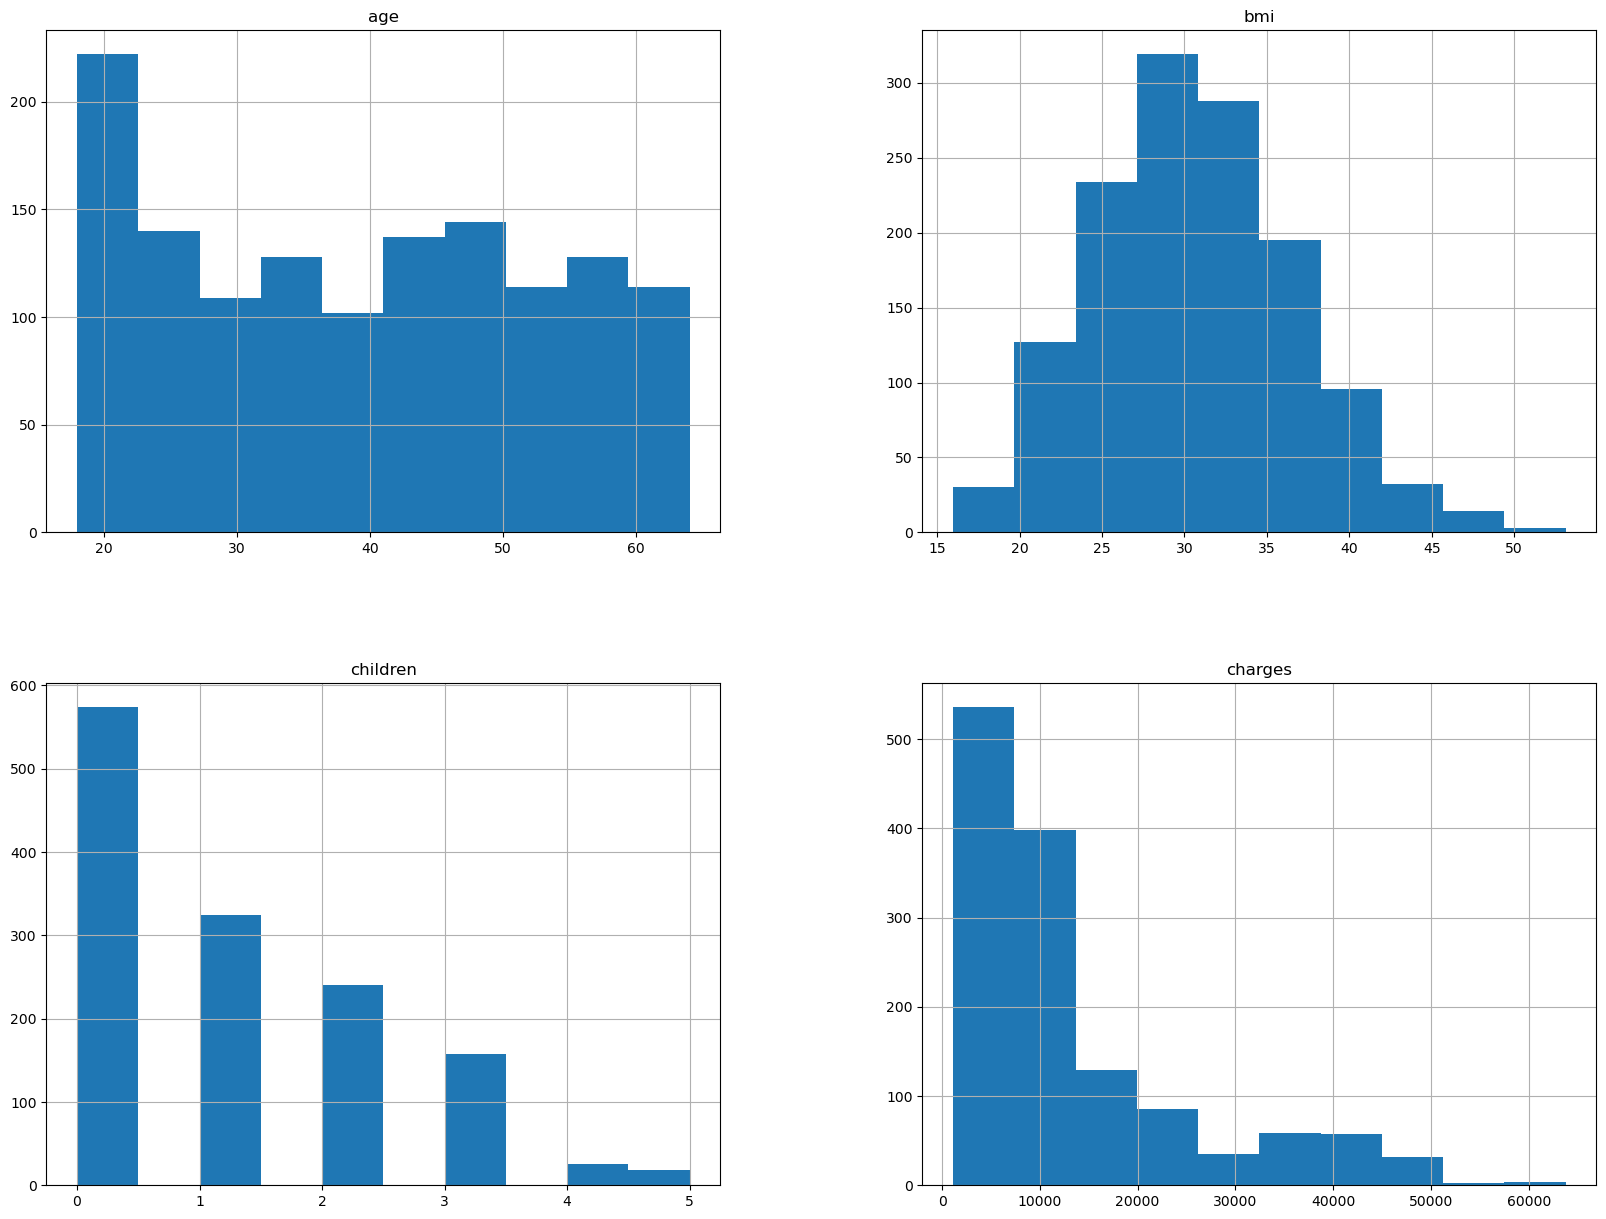

In [213]:
num_cols.hist(figsize=[20,15])
plt.show()

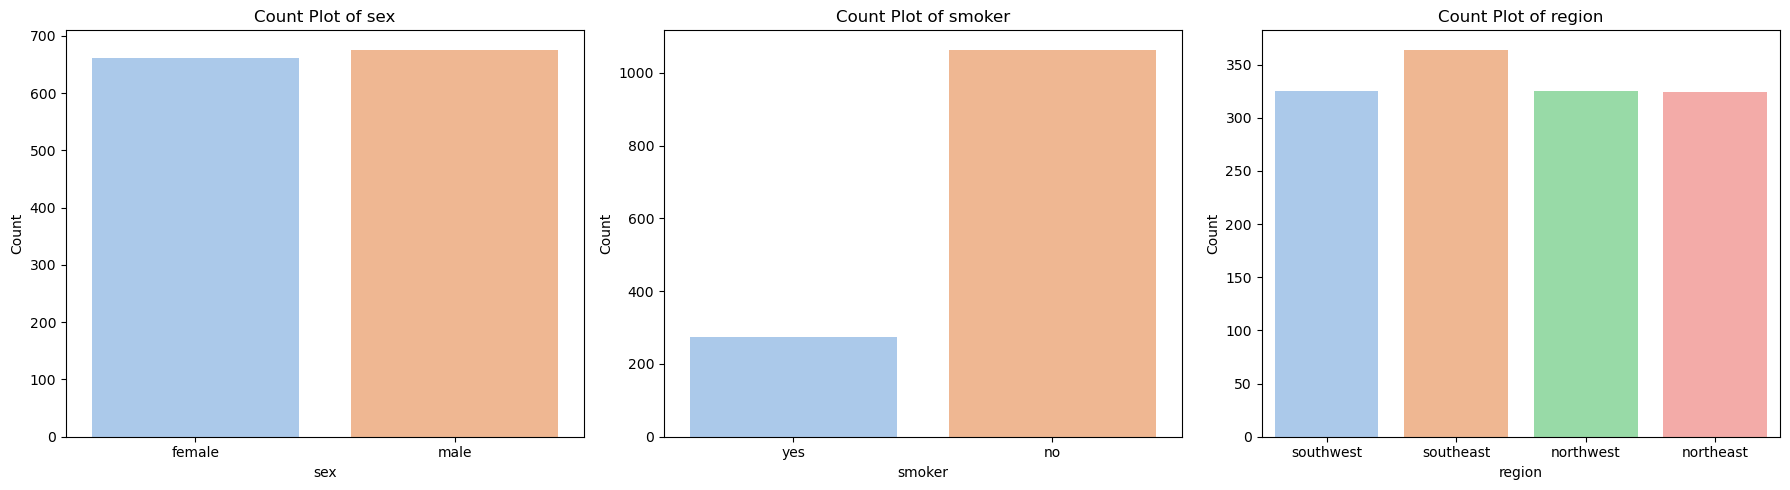

In [214]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

categorical_cols = ["sex", "smoker", "region"]

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.countplot(x=df[col], palette="pastel", ax=ax)
    ax.set_title(f"Count Plot of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

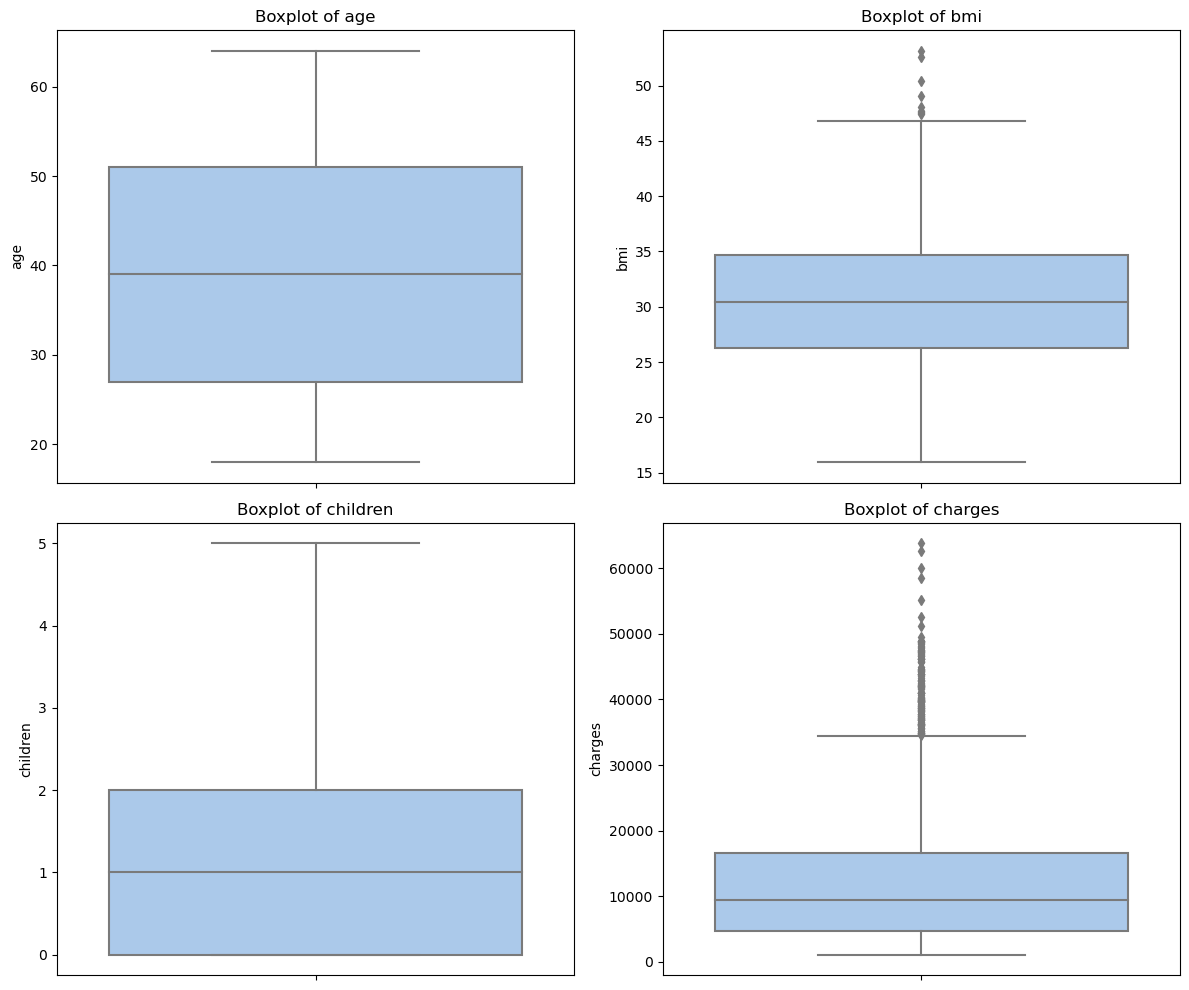

In [215]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

numerical_cols = ["age", "bmi", "children", "charges"]

for i, col in enumerate(numerical_cols):
    ax = axes[i // 2, i % 2]
    sns.boxplot(y=df[col], palette="pastel", ax=ax)
    ax.set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

# BIVARIATE ANALYSIS AND MULTIVARIATE ANALYSIS

In [216]:
num_cols=df.select_dtypes(include=["int64","float64"])

<Axes: >

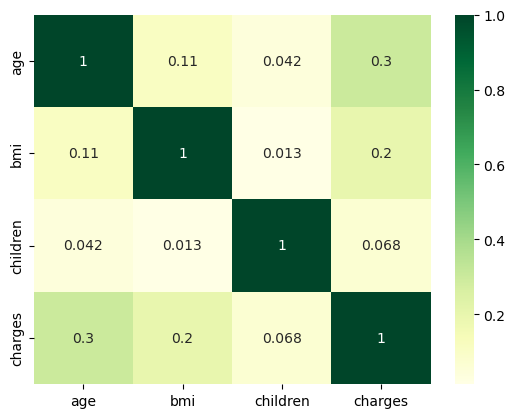

In [217]:
corr = num_cols.corr()

# plot the heatmap
sns.heatmap(corr,annot=True,cmap="YlGn")

Observation


very little correlation between charge and age, charge and bmi

C:\Users\emilb\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


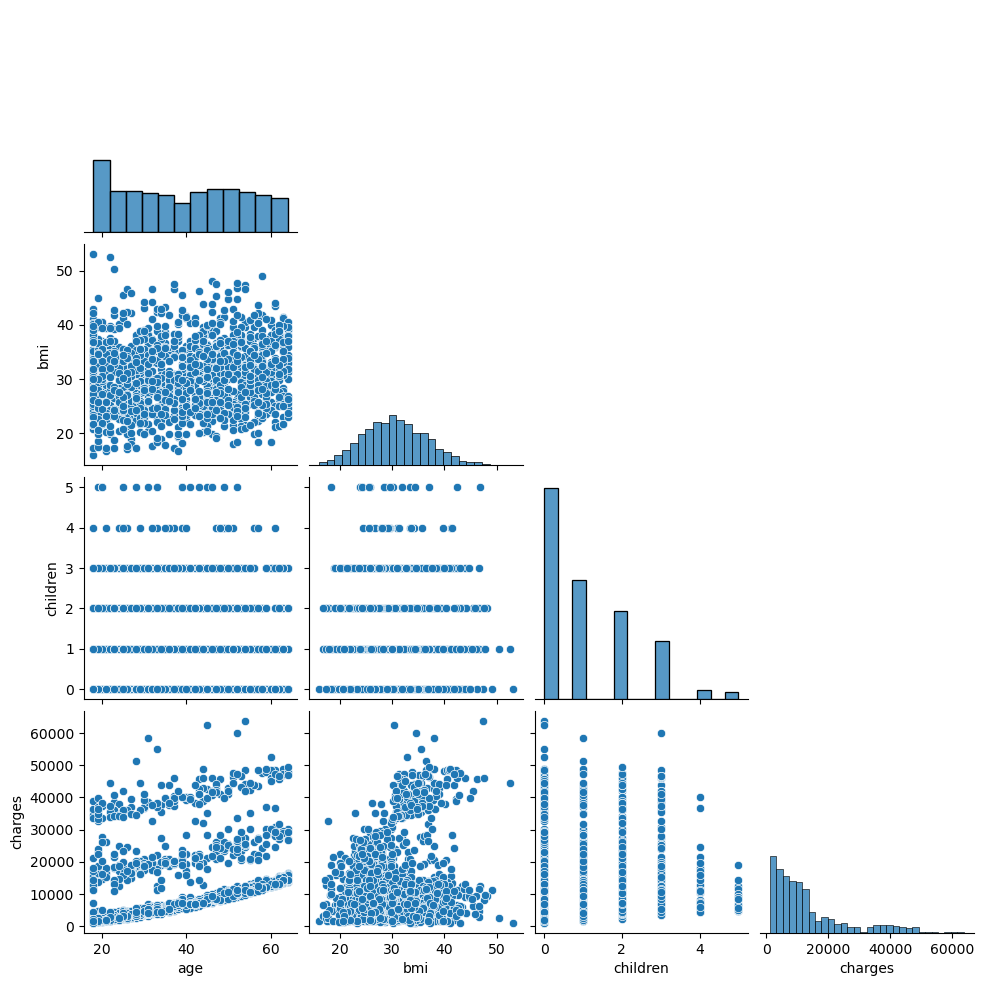

In [218]:
sns.pairplot(data=df , corner=True)
plt.show()

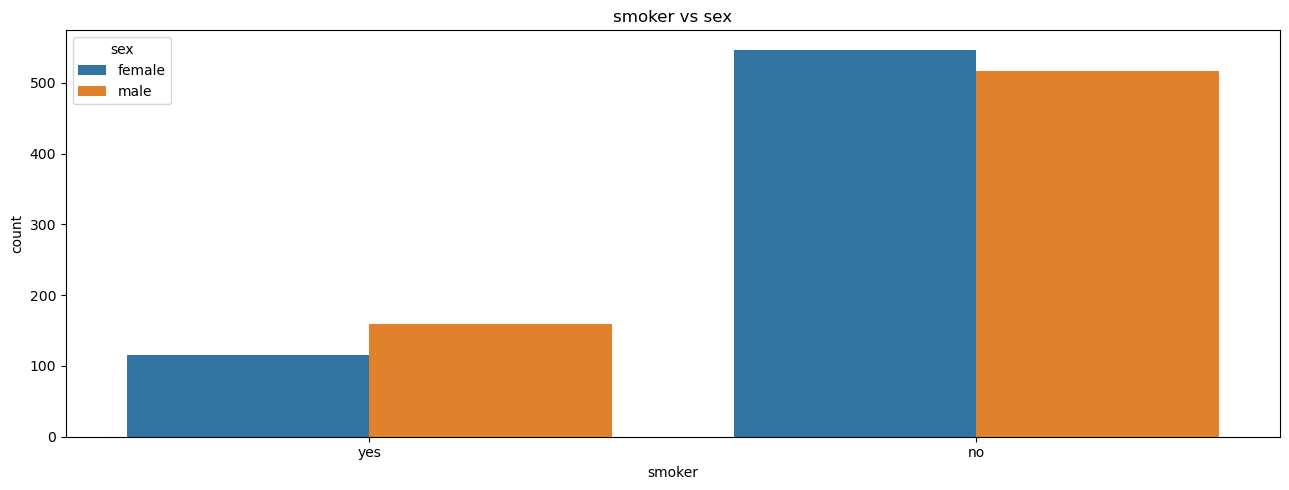

In [219]:
plt.figure(figsize=(13,5))
sns.countplot(df, x="smoker", hue="sex")
plt.title("smoker vs sex")
plt.tight_layout()

Text(0.5, 1.0, 'Smoker vs Charges')

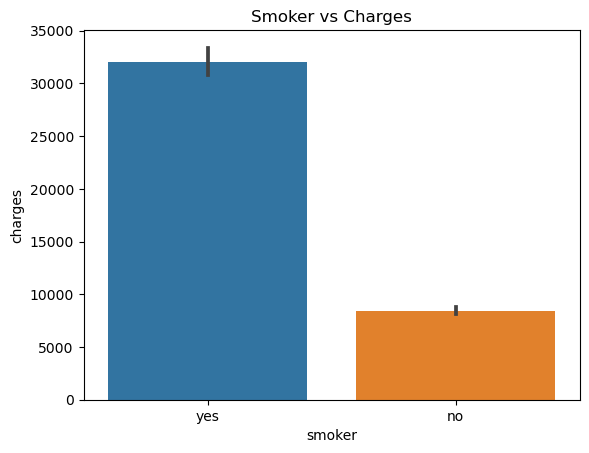

In [220]:
sns.barplot(df,x="smoker",y="charges")
plt.title("Smoker vs Charges")

Text(0.5, 1.0, 'Smoker vs Region')

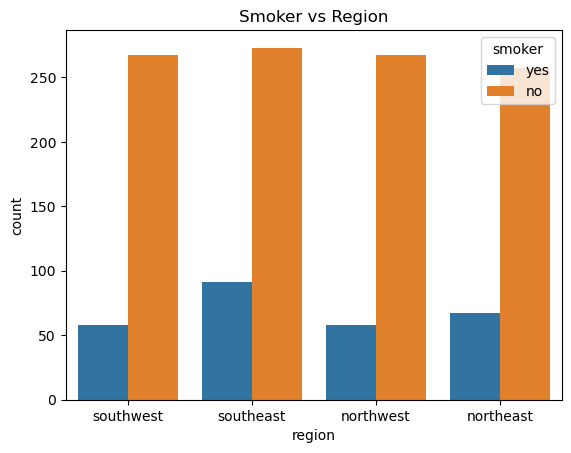

In [221]:
sns.countplot(x='region',hue='smoker',data=df)
plt.title("Smoker vs Region")

In [222]:
df.groupby("sex")["charges"].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

[Text(0.5, 1.0, 'Sex Vs Charges')]

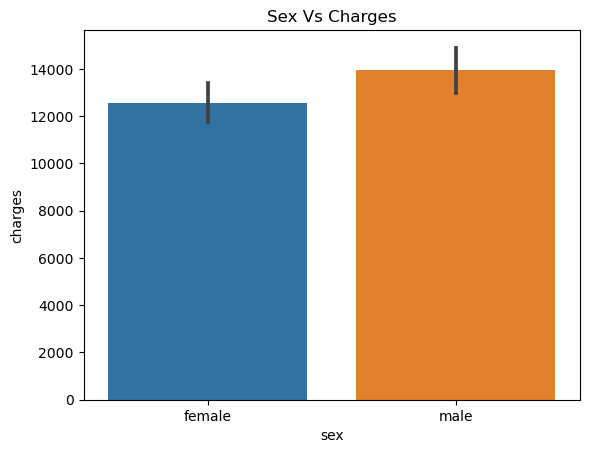

In [223]:
sns.barplot(df,x="sex",y="charges").set(title='Sex Vs Charges')

[Text(0.5, 1.0, 'Region Vs Charges')]

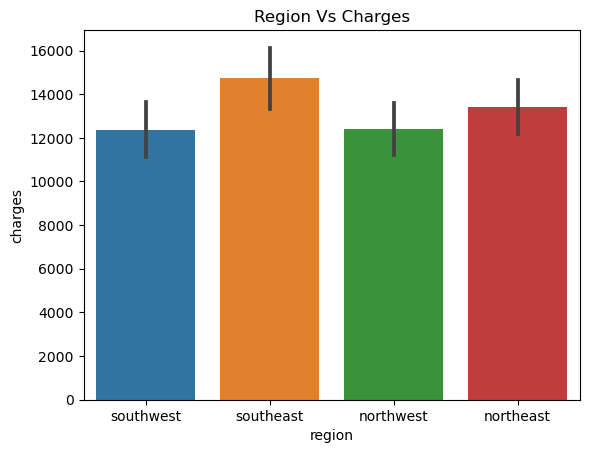

In [224]:
sns.barplot(x='region',y='charges',data=df).set(title='Region Vs Charges')

In [225]:

df["bmi_group"] = pd.cut(x=df['bmi'], bins=[15,25,35,45,55], labels=["15-25","25-35","35-45","45-55"])
df

,age,sex,bmi,children,smoker,region,charges,bmi_group
0,19,female,27.900,0,yes,southwest,16884.92400,25-35
1,18,male,33.770,1,no,southeast,1725.55230,25-35
2,28,male,33.000,3,no,southeast,4449.46200,25-35
3,33,male,22.705,0,no,northwest,21984.47061,15-25
4,32,male,28.880,0,no,northwest,3866.85520,25-35
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,25-35
1334,18,female,31.920,0,no,northeast,2205.98080,25-35
1335,18,female,36.850,0,no,southeast,1629.83350,35-45
1336,21,female,25.800,0,no,southwest,2007.94500,25-35


C:\Users\emilb\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


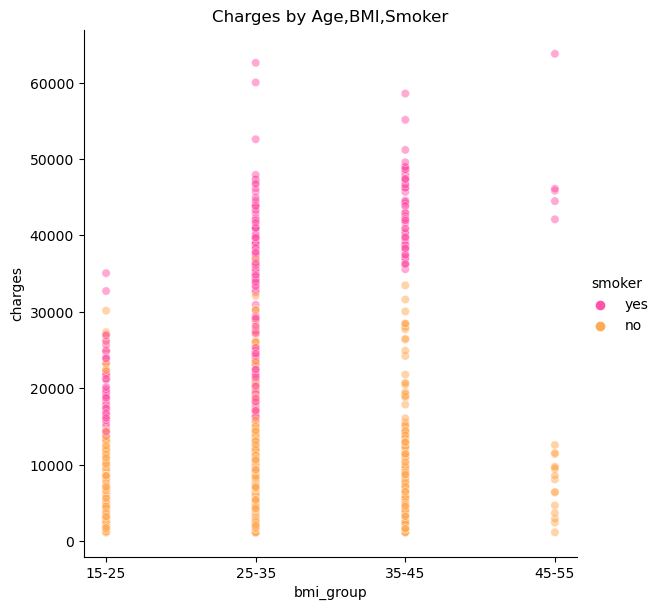

In [226]:
sns.relplot(x="bmi_group", y="charges", hue="smoker",   sizes=(40, 400), alpha=.5, palette="spring",
            height=6, data=df).set(title='Charges by Age,BMI,Smoker')

# Statistical Analysis

# Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

Step 1: Define null and alternative hypothesis
 
H0:μ1<=μ2  The average charges of smokers is less than or equal to nonsmokers
 
Ha:μ1>μ2 The average charges of smokers is greater than nonsmokers
    
Step 2: Decide the significance level. If P values is less than alpha reject the null hypothesis.
α = 0.05  
    
Step 3: Identify the test
Standard deviation of the population is not known ,will perform a T stat test . The > sign in alternate hypothesis indicate test is right tailed, that is all z values that would cause us to reject null hypothesis are in just one tail to the right of sampling distribution curve

Step 4: Calculate the test-statistics and p-value


In [227]:
smoker_df = df.loc[df["smoker"] == "yes"]
smoker_df

,age,sex,bmi,children,smoker,region,charges,bmi_group
0,19,female,27.900,0,yes,southwest,16884.92400,25-35
11,62,female,26.290,0,yes,southeast,27808.72510,25-35
14,27,male,42.130,0,yes,southeast,39611.75770,35-45
19,30,male,35.300,0,yes,southwest,36837.46700,35-45
23,34,female,31.920,1,yes,northeast,37701.87680,25-35
...,...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600,25-35
1314,30,female,23.655,3,yes,northwest,18765.87545,15-25
1321,62,male,26.695,0,yes,northeast,28101.33305,25-35
1323,42,female,40.370,2,yes,southeast,43896.37630,35-45


In [228]:
nosmoker_df = df.loc[df["smoker"] == "no"]
nosmoker_df

,age,sex,bmi,children,smoker,region,charges,bmi_group
1,18,male,33.770,1,no,southeast,1725.55230,25-35
2,28,male,33.000,3,no,southeast,4449.46200,25-35
3,33,male,22.705,0,no,northwest,21984.47061,15-25
4,32,male,28.880,0,no,northwest,3866.85520,25-35
5,31,female,25.740,0,no,southeast,3756.62160,25-35
...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,35-45
1333,50,male,30.970,3,no,northwest,10600.54830,25-35
1334,18,female,31.920,0,no,northeast,2205.98080,25-35
1335,18,female,36.850,0,no,southeast,1629.83350,35-45


In [229]:
avg_nonsmoker_charge=nosmoker_df["charges"].mean()

In [230]:
avg_nonsmoker_charge

8434.268297856204

In [231]:
avg_smoker_charge=smoker_df["charges"].mean()

In [232]:
avg_smoker_charge

32050.23183153284

In [233]:
from scipy.stats import ttest_ind
alpha=0.05
t_statistic_1, p_value_1 = ttest_ind(smoker_df["charges"],nosmoker_df["charges"],equal_var=False )
p_value_onetail=p_value_1/2


In [234]:
print("Test statistic = {} , Pvalue ={} ".format(t_statistic_1,p_value_1 ))

Test statistic = 32.751887766341824 , Pvalue =5.88946444671698e-103 


In [235]:
if p_value_1 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_onetail,alpha) )
    print("Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.")
    
else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    print("Failed to Reject Null Hypothesis that Average charges for smokers are less than nonsmoker.")

Conclusion:Since P value 2.94473222335849e-103 is less than alpha 0.05 
Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.


# 2.Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

Let μ1 and μ2 be the respective population means for BMI of males and BMI of females
Step 1: Define null and alternative hypothesis
 
H0:μ1−μ2=0  There is no difference between the BMI of Male and BMI of female. 
Ha:μ1−μ2!=0  There is difference between the BMI of Male and BMI of female.

Step 2: Decide the significance level
α = 0.05

Step 3:Identify the test
Standard deviation of the population is not known ,will perform a T stat test.Not equal to sign in alternate hypothesis indicate its a two tailed test.

Step 4: Calculate the test-statistics and p-value

In [236]:
male=df.loc[df["sex"]=="male"]
male

,age,sex,bmi,children,smoker,region,charges,bmi_group
1,18,male,33.770,1,no,southeast,1725.55230,25-35
2,28,male,33.000,3,no,southeast,4449.46200,25-35
3,33,male,22.705,0,no,northwest,21984.47061,15-25
4,32,male,28.880,0,no,northwest,3866.85520,25-35
8,37,male,29.830,2,no,northeast,6406.41070,25-35
...,...,...,...,...,...,...,...,...
1324,31,male,25.935,1,no,northwest,4239.89265,25-35
1325,61,male,33.535,0,no,northeast,13143.33665,25-35
1327,51,male,30.030,1,no,southeast,9377.90470,25-35
1329,52,male,38.600,2,no,southwest,10325.20600,35-45


In [237]:
female=df.loc[df["sex"]=="female"]
female

,age,sex,bmi,children,smoker,region,charges,bmi_group
0,19,female,27.90,0,yes,southwest,16884.92400,25-35
5,31,female,25.74,0,no,southeast,3756.62160,25-35
6,46,female,33.44,1,no,southeast,8240.58960,25-35
7,37,female,27.74,3,no,northwest,7281.50560,25-35
9,60,female,25.84,0,no,northwest,28923.13692,25-35
...,...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500,35-45
1334,18,female,31.92,0,no,northeast,2205.98080,25-35
1335,18,female,36.85,0,no,southeast,1629.83350,35-45
1336,21,female,25.80,0,no,southwest,2007.94500,25-35


In [238]:
from scipy.stats import ttest_ind
alpha=0.05
t_statistic_2, p_value_2 = ttest_ind(male["bmi"],female["bmi"],equal_var=False )
print("tstats = ",t_statistic_2, ", pvalue = ", p_value_2)

tstats =  1.697027933124022 , pvalue =  0.08992430667834876


In [239]:
if p_value_2 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_2,alpha) )
    print("Reject Null Hypothesis  that there is  difference in bmi of men and bmi of female.")
    
else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_2,alpha))
    print("Failed to Reject Null Hypothesis  that there is no difference in bmi of men and bmi of female .")


Conclusion:Since P value 0.08992430667834876 is greater than alpha 0.05 
Failed to Reject Null Hypothesis  that there is no difference in bmi of men and bmi of female .


# 3.Is the proportion of smokers significantly different across different regions?

Step 1: Define null and alternative hypotheses * H0 Smokers proportions is not significantly different across different regions * Ha Smokers proportions is different across different regions


Step 2: Decide the significance level
α = 0.05

Step 3: Identify Test
Here we are comparing two different categorical variables, smoker and different region. So perform a Chi-sq Test.

Step 4: Calculate the test-statistics and p-value

In [240]:
contigency= pd.crosstab(df.region, df.smoker)
contigency

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


<Axes: xlabel='region'>

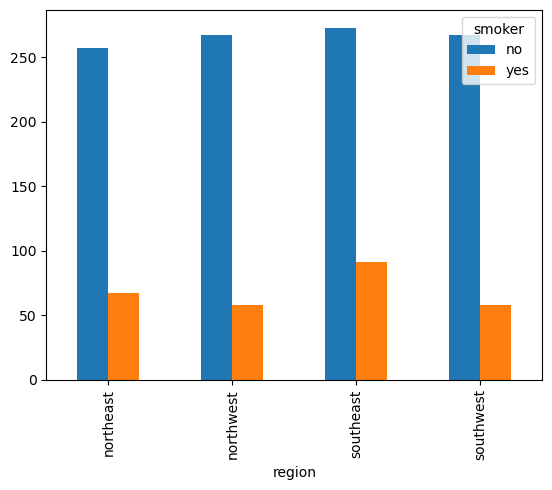

In [241]:
contigency.plot(kind='bar')

In [242]:
from   scipy.stats import chi2_contingency 
chi2, pval, dof, exp_freq = chi2_contingency(contigency, correction = False)
print('chi-square statistic: {} , Pvalue: {} , Degree of freedom: {} ,expected frequencies: {} '.format(chi2, pval, dof, exp_freq))

chi-square statistic: 7.343477761407071 , Pvalue: 0.06171954839170541 , Degree of freedom: 3 ,expected frequencies: [[257.65022422  66.34977578]
 [258.44544096  66.55455904]
 [289.45889387  74.54110613]
 [258.44544096  66.55455904]] 


In [243]:
if (pval < 0.05):
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Failed to reject Null Hypothesis


# 4.Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

In [244]:
df_female=df.loc[df["sex"]=="female"]
df_female

,age,sex,bmi,children,smoker,region,charges,bmi_group
0,19,female,27.90,0,yes,southwest,16884.92400,25-35
5,31,female,25.74,0,no,southeast,3756.62160,25-35
6,46,female,33.44,1,no,southeast,8240.58960,25-35
7,37,female,27.74,3,no,northwest,7281.50560,25-35
9,60,female,25.84,0,no,northwest,28923.13692,25-35
...,...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500,35-45
1334,18,female,31.92,0,no,northeast,2205.98080,25-35
1335,18,female,36.85,0,no,southeast,1629.83350,35-45
1336,21,female,25.80,0,no,southwest,2007.94500,25-35


In [245]:
df_female_child=df_female[df_female["children"] <= 2]
df_female_child

,age,sex,bmi,children,smoker,region,charges,bmi_group
0,19,female,27.90,0,yes,southwest,16884.92400,25-35
5,31,female,25.74,0,no,southeast,3756.62160,25-35
6,46,female,33.44,1,no,southeast,8240.58960,25-35
9,60,female,25.84,0,no,northwest,28923.13692,25-35
11,62,female,26.29,0,yes,southeast,27808.72510,25-35
...,...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733,25-35
1334,18,female,31.92,0,no,northeast,2205.98080,25-35
1335,18,female,36.85,0,no,southeast,1629.83350,35-45
1336,21,female,25.80,0,no,southwest,2007.94500,25-35


In [246]:
import pandas as pd
from scipy.stats import f_oneway

# Assuming df_female_child is already defined as per your provided data

# Filter the DataFrame for women with 0, 1, and 2 children
bmi_no_children = df_female_child[df_female_child['children'] == 0]['bmi']
bmi_one_child = df_female_child[df_female_child['children'] == 1]['bmi']
bmi_two_children = df_female_child[df_female_child['children'] == 2]['bmi']

# Perform ANOVA test
f_statistic, p_value = f_oneway(bmi_no_children, bmi_one_child, bmi_two_children)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


# Interpret the result
if p_value < 0.05:
    print("The mean BMI is significantly different among the groups.")
else:
    print("There is no significant difference in the mean BMI among the groups.")

F-statistic: 0.3344720147757968
P-value: 0.7158579926754841
There is no significant difference in the mean BMI among the groups.
